$$
\newcommand{\mat}[1]{\boldsymbol {#1}}
\newcommand{\mattr}[1]{\boldsymbol {#1}^\top}
\newcommand{\matinv}[1]{\boldsymbol {#1}^{-1}}
\newcommand{\vec}[1]{\boldsymbol {#1}}
\newcommand{\vectr}[1]{\boldsymbol {#1}^\top}
\newcommand{\rvar}[1]{\mathrm {#1}}
\newcommand{\rvec}[1]{\boldsymbol{\mathrm{#1}}}
\newcommand{\diag}{\mathop{\mathrm {diag}}}
\newcommand{\set}[1]{\mathbb {#1}}
\newcommand{\norm}[1]{\left\lVert#1\right\rVert}
\newcommand{\pderiv}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\bb}[1]{\boldsymbol{#1}}
$$
# Part 6: YOLO - Objects Detection
<a id=part6></a>

In this part we will use an object detection architecture called YOLO (You only look once) to detect objects in images. We'll use an already trained model weights (v5) found here: https://github.com/ultralytics/yolov5

In [1]:
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Load the YOLO model
model = torch.hub.load("ultralytics/yolov5", "yolov5s")
model.to(device)
# Images
img1 = 'imgs/DolphinsInTheSky.jpg'  
img2 = 'imgs/cat-shiba-inu-2.jpg' 

Using cache found in /home/almogbs/.cache/torch/hub/ultralytics_yolov5_master
requirements: Ultralytics requirement "gitpython>=3.1.30" not found, attempting AutoUpdate...
requirements: ❌ AutoUpdate skipped (offline)
YOLOv5 🚀 2023-5-24 Python-3.8.12 torch-1.10.1 CUDA:0 (NVIDIA GeForce RTX 2080 Ti, 11019MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


## Inference with YOLO
<a id=part6_1></a>

You are provided with 2 images (img1 and img2).
**TODO**:
1. Detect objects using the YOLOv5 model for these 2 images.
2. Print the inference output with bounding boxes.
3. Calculate the number of pixels within a bounding box and the number in the background.
   
   **Hint**: Given you stored the model output in a varibale named 'results', you may find 'results.pandas().xyxy' helpful 
4. Look at the inference results and answer the question below.


image 1/1: 183x275 2 persons, 1 surfboard
Speed: 19.7ms pre-process, 14.0ms inference, 1.6ms NMS per image at shape (1, 3, 448, 640)


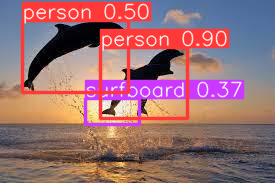

image 1/1: 750x750 2 cats, 1 dog
Speed: 3.6ms pre-process, 14.4ms inference, 1.6ms NMS per image at shape (1, 3, 640, 640)


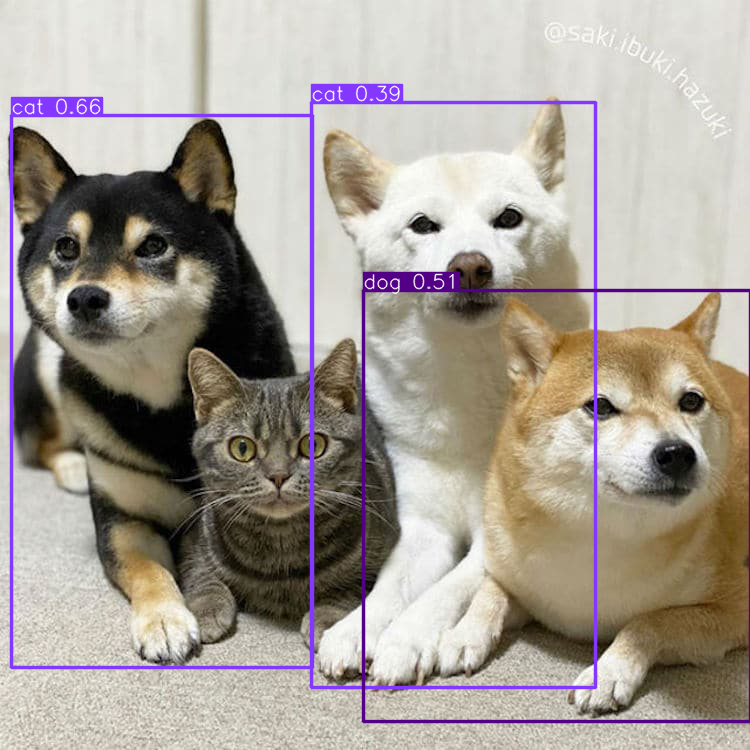

img0: box0: Pixels in box=6226.57311574585, Pixels in bg=44098.42688425415
img0: box1: Pixels in box=7591.799347739641, Pixels in bg=42733.20065226036
img0: box2: Pixels in box=1421.1535100101028, Pixels in bg=48903.8464899899
img1: box0: Pixels in box=166120.12166785222, Pixels in bg=396379.8783321478
img1: box1: Pixels in box=166799.70922957268, Pixels in bg=395700.2907704273
img1: box2: Pixels in box=166169.93633117527, Pixels in bg=396330.06366882473


In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

def detect_image(image_path):
    # Load image
    img = Image.open(image_path)
    img = np.array(img)
    # Inference
    results = model(img)
    # Results
    shape = img.shape
    results.print()
    results.show()
    return shape, results

with torch.no_grad():
    
    shape1, results1 = detect_image(img1)
    shape2, results2 = detect_image(img2)
    
    total_pixels1 = shape1[0] * shape1[1]
    total_pixels2 = shape2[0] * shape2[1]
    totals = [total_pixels1, total_pixels2]
    
    for i, res in enumerate([results1, results2]):
        w = res.pandas().xyxy[0]["xmax"] - res.pandas().xyxy[0]["xmin"]
        h = res.pandas().xyxy[0]["ymax"] - res.pandas().xyxy[0]["ymin"]
        boxes_pixels = list(w * h)
        
        for j, box in enumerate(boxes_pixels):
            print(f"img{i}: box{j}: Pixels in box={box}, Pixels in bg={totals[i] - box}")
        

### Question 1

Analyze the inference results of the 2 images. 
1. How well did the model detect the objects in the pictures?
2. What can possibly be the reason for the model failures? suggest methods to resolve that issue.

In [ ]:
display_answer(hw2.answers.part6_q1)


## Creative Detection Failures

<a id=part6_2></a>

Object detection pitfalls could be, for example: **occlusion** - when the objects are partially occlude, and thus missing important features, **model bias** - when a model learn some bias about an object, it could recognize it as something else in a different setup, and many others like **Deformation**, **Illumination conditions**, **Cluttered** or **textured background and blurring** due to moving objects.

**TODO**: Take pictures and that demonstrates 3 of the above object detection pitfalls, run inference and analyze the results.

image 1/1: 406x826 1 zebra
Speed: 21.7ms pre-process, 14.3ms inference, 1.7ms NMS per image at shape (1, 3, 320, 640)


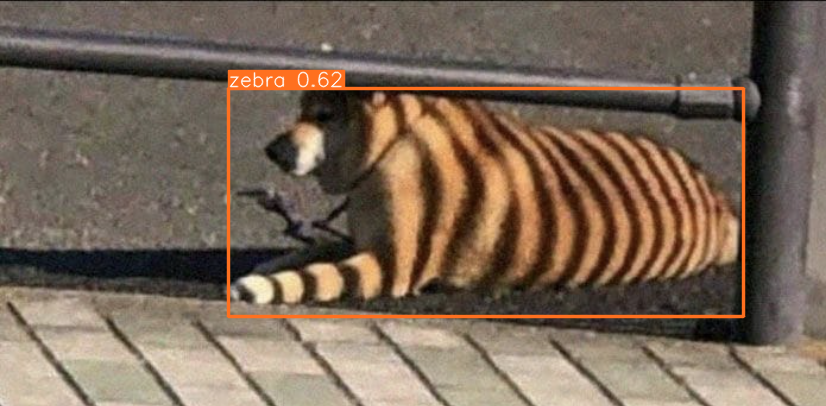

image 1/1: 1156x1600 1 person
Speed: 2.9ms pre-process, 18.4ms inference, 1.3ms NMS per image at shape (1, 3, 480, 640)


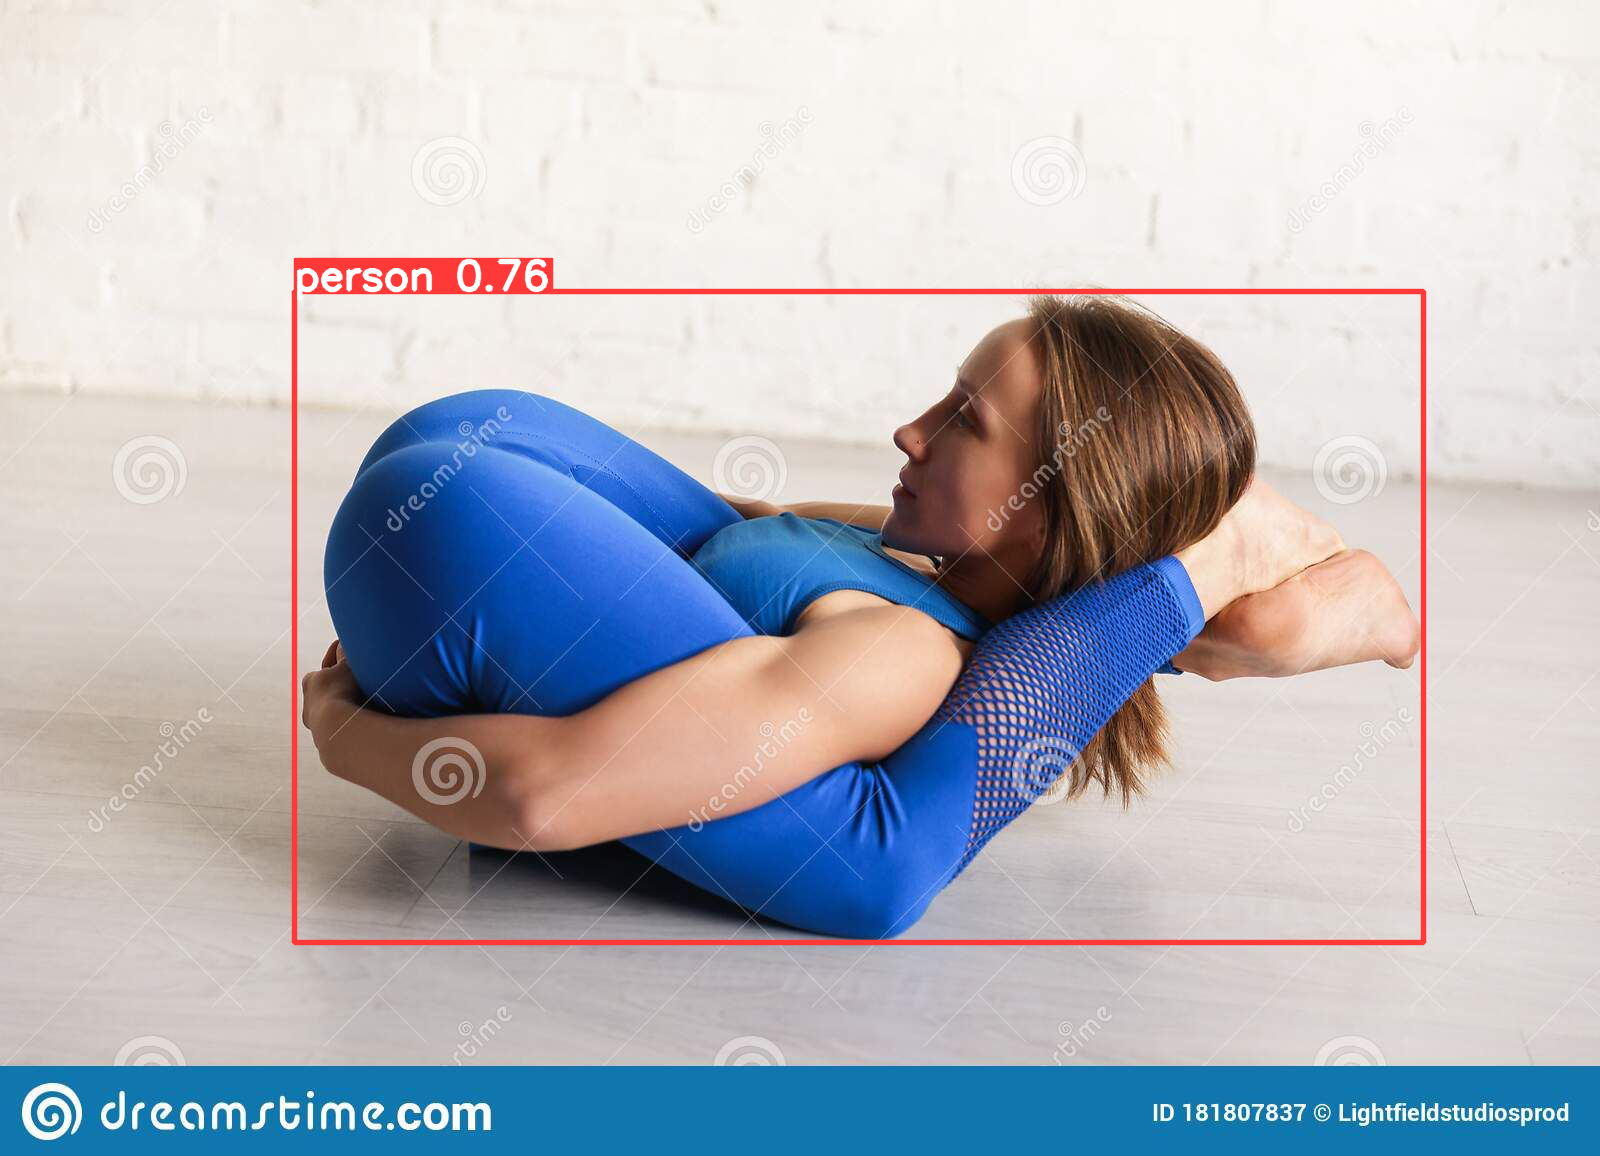

NameError: name 'img3' is not defined

In [28]:
img1 = 'imgs/pic1.png'  
img2 = 'imgs/pic2.jpg' 
img3 = 'imgs/pic3.jpg' 

with torch.no_grad():
    
    shape1, results1 = detect_image(img1)
    shape2, results2 = detect_image(img2)
    shape3, results3 = detect_image(img3)


### Question 3

Analyize the results of the inference. 
1. How well did the model detect the objects in the pictures? explain.


In [ ]:
display_answer(hw2.answers.part6_q3)


## Bonus 
<a id=part6_3></a>

Try improving the model performance over poorly recognized images by changing them. 
Describe the manipulations you did to the pictures.

In [ ]:
#insert bonus code here

In [ ]:
display_answer(hw2.answers.part6_bonus)
